# Ejercicio de Regresión 1 (Core)

## Objetivo

Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

<strong>Descripción del problema:</strong> Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

## Instrucciones

#### 1. Carga de datos: Descarga el archivo de datos [house_prices.csv](https://github.com/ywchiu/riii/blob/master/data/house-prices.csv) que contiene las siguientes columnas:

* SqFt: Tamaño de la casa en pies cuadrados.
* Bedrooms: Número de habitaciones.
* Bathrooms: Número de baños.
* price: Precio de venta de la casa.

#### 2. Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
#### 3. Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
#### 4. Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
#### 5. Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R2) del modelo.
#### 6: Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:

* Tamaño: 2000 pies cuadrados
* Habitaciones: 3
* Baños: 2

## Resolución

### 1. Carga de datos.

In [115]:
import pandas as pd

camino_dataset = "../data/house-prices.csv"
df = pd.read_csv(camino_dataset, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


### 2. Exploración de datos

In [116]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


En general no existen registros duplicados. Analizando la columna Home, da la impresión de que es una columna de tipo ID. Verificamos si es así entresacando todos los valores únicos.

In [117]:
# Solo para corroborar, sacamos los clientes únicos y vemos si la cantidad es igual a la cantidad de filas del dataframe

clientes_unicos = df["Home"].unique()

if len(clientes_unicos) != df.shape[0]:
    print("Hay mas de una fila para una misma casa.")
else:
    print("Cada fila del dataframe corresponde a una casa única.")

Cada fila del dataframe corresponde a una casa única.


Al ser Home único para cada entrada, asumimos que este campo es un identificador numérico. Como es una ID por casa es improbable que hayan duplicados. De igual manera, se corrobora la cant. de duplicados excluyendo la columna Home.

In [118]:
duplicados_sin_home = df.drop("Home", axis=1).duplicated()

cant_registros_duplicados_sin_home = duplicados_sin_home.sum()

print(f"Cant. de Registros Duplicados sin Home: {cant_registros_duplicados_sin_home}")

Cant. de Registros Duplicados sin Home: 0


Tampoco se encuentran filas duplicadas por excluyendo la columna Home. Se asume que ya no existen columnas duplicadas.

Verificamos si existen valores nulos en el dataframe.

In [119]:
from eda_utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
Home,128,0,0.0
Price,128,0,0.0
SqFt,128,0,0.0
Bedrooms,128,0,0.0
Bathrooms,128,0,0.0
Offers,128,0,0.0
Brick,128,0,0.0
Neighborhood,128,0,0.0


Al parecer, no hay datos nulos en el dataframe. Procedemos a verificar valores anómalos usando estadísticas descriptivas.

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Home,128.0,64.500000,37.094474,1.0,32.75,64.5,96.25,128.0
Price,128.0,130427.343750,26868.770371,69100.0,111325.00,125950.0,148250.00,211200.0
SqFt,128.0,2000.937500,211.572431,1450.0,1880.00,2000.0,2140.00,2590.0
Bedrooms,128.0,3.023438,0.725951,2.0,3.00,3.0,3.00,5.0
Bathrooms,128.0,2.445312,0.514492,2.0,2.00,2.0,3.00,4.0
Offers,128.0,2.578125,1.069324,1.0,2.00,3.0,3.00,6.0


Según las estadísticas, no parece haber ningún anómalo en las columnas. El tamaño SqFt parece ser normal para las casas, y los precios no presentan un rango muy grande tampoco. Cant. de abitaciones, baños, y ofertas se ven normales.

Verificamos las columnas categóricas.

In [121]:
from eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['Brick', 'Neighborhood']

Verificamos los únicos en las columnas categóricas

In [122]:
for columna_categorica in columnas_categoricas:
    valores_unicos = list(df[columna_categorica].unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna Brick: ['No', 'Yes']
Valores únicos en columna Neighborhood: ['East', 'North', 'West']


Limpiamos las columnas

In [123]:
from eda_utils import limpiar_cadena


for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

Volvemos a verificar

In [124]:
for columna_categorica in columnas_categoricas:
    valores_unicos = list(df[columna_categorica].unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna Brick: ['no', 'yes']
Valores únicos en columna Neighborhood: ['east', 'north', 'west']


Al parecer los valores únicos están correctos. Configuramos los tipos correctos para las columnas.

In [125]:
from eda_utils import corregir_tipos_columnas

tipos_columnas_esperados = {
    "Home": "int64",
    "Price": "int64",
    "SqFt": "int64",
    "Bedrooms": "int64",
    "Bathrooms": "int64",
    "Offers": "int64",
    "Brick": "string",
    "Neighborhood": "string",
}

corregir_tipos_columnas(df, tipos_columnas_esperados)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    string
 7   Neighborhood  128 non-null    string
dtypes: int64(6), string(2)
memory usage: 8.1 KB


Verificamos si existen outliers en las columnas numéricas.

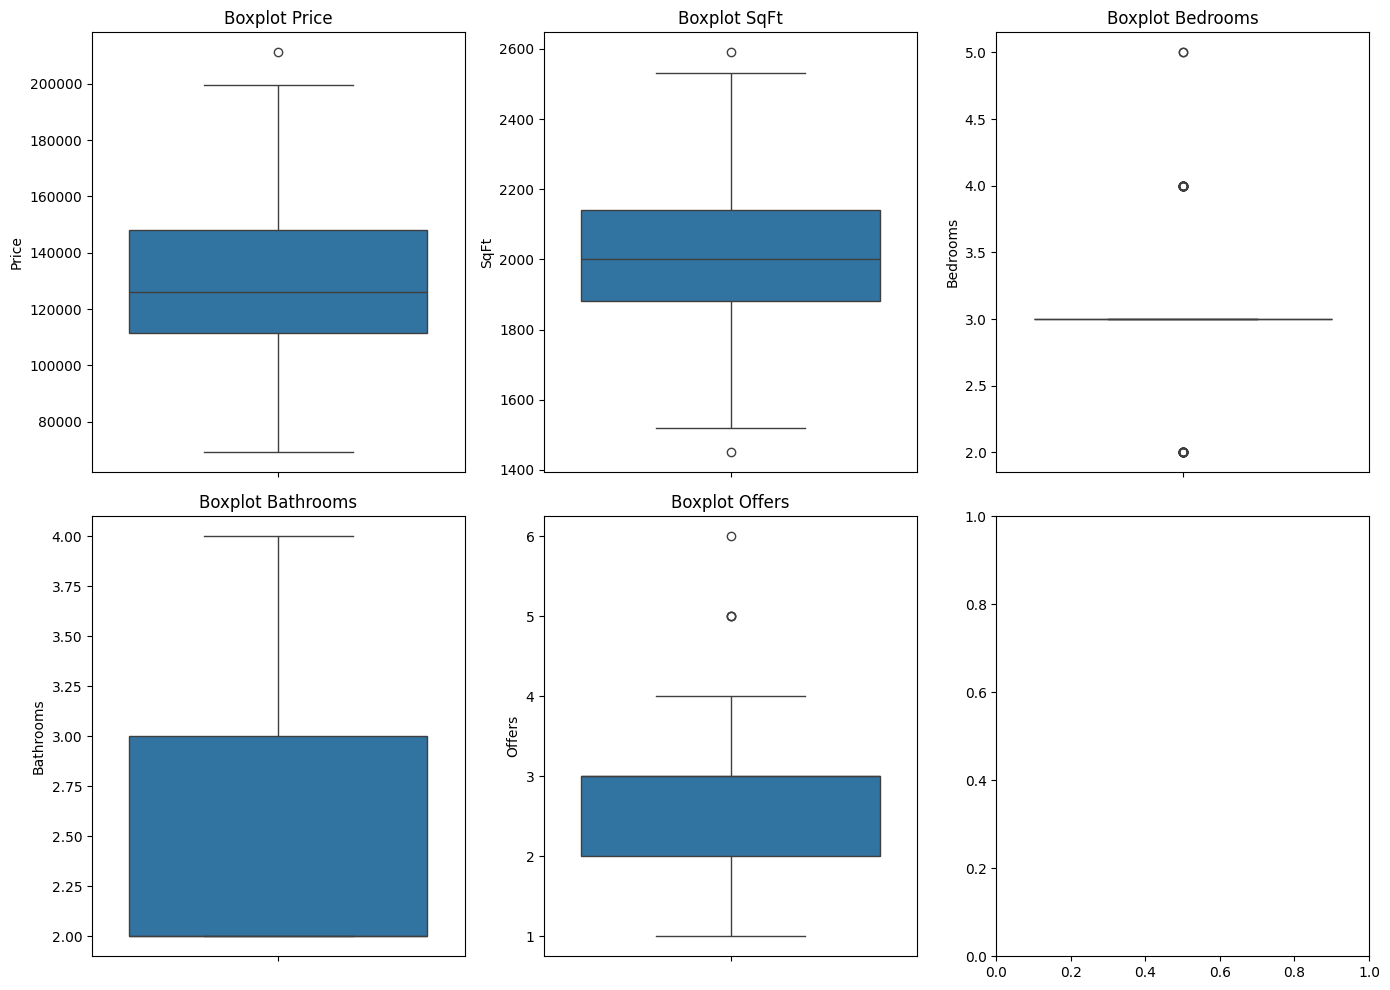

In [126]:
from eda_utils import graficar_boxplots

graficar_boxplots(df, ["Price", "SqFt", "Bedrooms", "Bathrooms", "Offers"])

Análisis de columnas:

* Price: se nota un outlier pero se asume que es un dato normal.
* SqFt: también existe un outlier, pero el hecho de ser outlier no indica que esté mal y podría simplemente ser un valor grande en el dataframe.
* Beedrooms: La mayoría de las casas en este dataframe poseen 3 habitaciones, y se pueden notar unos pocos outliers de 2, 4 y 5 habitaciones.
* Bathrooms: No se encuentran outliers y hay una pequeña cant. de casas que poseen 4 baños, siendo lo mas normal que tengan entre 2 y 3 baños.
* Offers: La mayoría de las casas tienen entre 2 y tes ofertas, con unas pocas con 4 ofertas. Se pueden notar también outliers de 5 y 6 ofertas.

También, se visualiza la correlación entre el tamaño (SqFt) y el precio (Price).

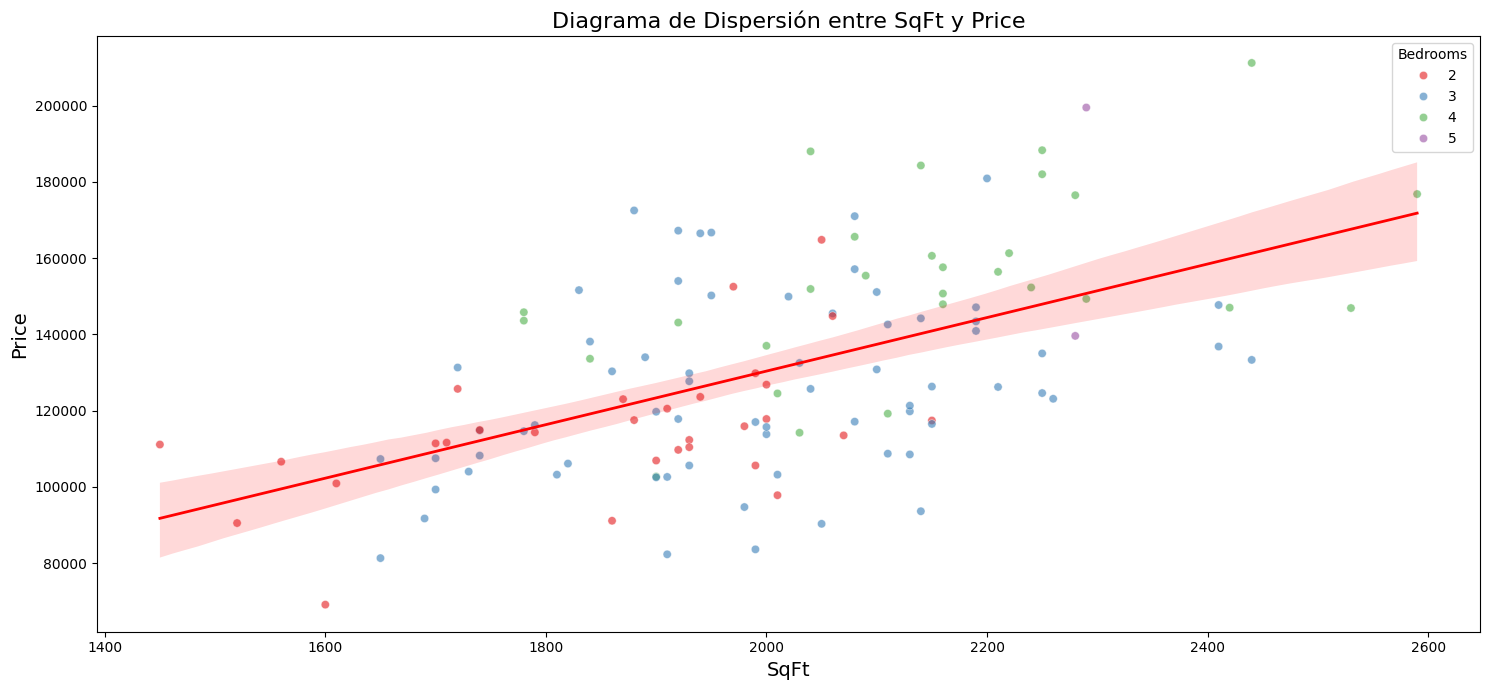

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="SqFt",
    y="Price",
    hue="Bedrooms",
    data=df,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre SqFt y Price', fontsize=16)
plt.xlabel('SqFt', fontsize=14)
plt.ylabel('Price', fontsize=14)

sns.regplot(
    x="SqFt",
    y="Price",
    data=df,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

Efectivamente, se puede visualizar que a medida que incrementa el tamaño incrementa el precio. De igual manera, se puede visualizar dispersión en los datos.

### 3. Preparación de datos.

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


campo_salida = "Price"
campos_entrada = ["SqFt", "Bedrooms", "Bathrooms"]

X = df[[*campos_entrada]]
y = df[campo_salida]

# Dividimos el dataset en 80% para entrenamiento y 20% para testeo de acuerdo a lo indicado en el ejercicio.
X_train_no_cat_no_offer, X_test_no_cat_no_offer, y_train_no_cat_no_offer, y_test_no_cat_no_offer = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)


### 4. Entrenamiento del modelo

In [129]:
# Crear y entrenar el modelo de regresión lineal
modelo_no_cat_no_offer = LinearRegression()
modelo_no_cat_no_offer.fit(X_train_no_cat_no_offer, y_train_no_cat_no_offer)

LinearRegression()

### 5. Evaluación del modelo

Evaluamos los resultados del modelo.

In [130]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones
y_pred_no_cat_no_offer = modelo_no_cat_no_offer.predict(X_test_no_cat_no_offer)

# Evaluar el modelo
rmse = root_mean_squared_error(y_test_no_cat_no_offer, y_pred_no_cat_no_offer)
mse = rmse ** 2
r2 = r2_score(y_test_no_cat_no_offer, y_pred_no_cat_no_offer)
mae = mean_absolute_error(y_test_no_cat_no_offer, y_pred_no_cat_no_offer)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')
print(f'Error Absoluto Medio: {mae}')

Error Cuadrático Medio: 448551131.8769411
R-cuadrado: 0.3074044901475441
Error Absoluto Medio: 18231.563235741112


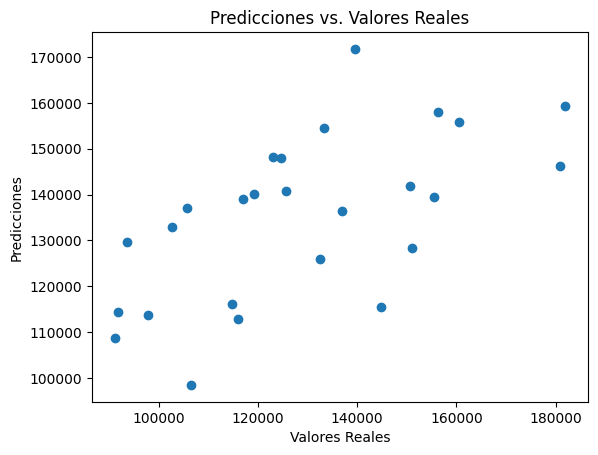

In [131]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test_no_cat_no_offer, y_pred_no_cat_no_offer)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Adicionalmente, probamos solamente con tamaño (SqFt) para realizar la predicción y ver si los resultados son mejores o no.

In [132]:
campo_salida = "Price"
campos_entrada = ["SqFt",]

X = df[[*campos_entrada]]
y = df[campo_salida]

# Dividimos el dataset en 80% para entrenamiento y 20% para testeo de acuerdo a lo indicado en el ejercicio.
X_train_solo_sqft, X_test_solo_sqft, y_train_solo_sqft, y_test_solo_sqft = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

# Crear y entrenar el modelo de regresión lineal
modelo_solo_sqft = LinearRegression()
modelo_solo_sqft.fit(X_train_solo_sqft, y_train_solo_sqft)

LinearRegression()

In [133]:
# Realizar predicciones
y_pred_solo_sqft = modelo_solo_sqft.predict(X_test_solo_sqft)

# Evaluar el modelo
rmse = root_mean_squared_error(y_test_solo_sqft, y_pred_solo_sqft)
mse = rmse ** 2
r2 = r2_score(y_test_solo_sqft, y_pred_solo_sqft)
mae = mean_absolute_error(y_test_solo_sqft, y_pred_solo_sqft)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')
print(f'Error Absoluto Medio: {mae}')

Error Cuadrático Medio: 474303210.1454579
R-cuadrado: 0.2676414118480629
Error Absoluto Medio: 18513.94429080522


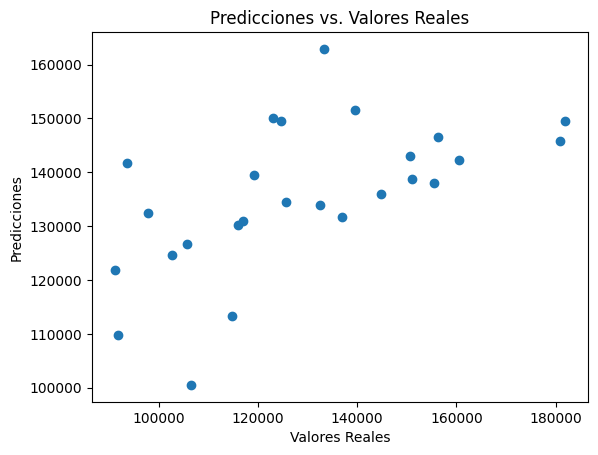

In [134]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test_solo_sqft, y_pred_solo_sqft)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Probamos también con todas las variables excepto las categóricas.

In [135]:
campo_salida = "Price"
campos_entrada = ["SqFt", "Bedrooms", "Bathrooms", "Offers"]

X = df[[*campos_entrada]]
y = df[campo_salida]

# Dividimos el dataset en 80% para entrenamiento y 20% para testeo de acuerdo a lo indicado en el ejercicio.
X_train_no_cat, X_test_no_cat, y_train_no_cat, y_test_no_cat = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

# Crear y entrenar el modelo de regresión lineal
modelo_no_cat = LinearRegression()
modelo_no_cat.fit(X_train_no_cat, y_train_no_cat)

LinearRegression()

In [136]:
# Realizar predicciones
y_pred_no_cat = modelo_no_cat.predict(X_test_no_cat)

# Evaluar el modelo
rmse = root_mean_squared_error(y_test_no_cat, y_pred_no_cat)
mse = rmse ** 2
r2 = r2_score(y_test_no_cat, y_pred_no_cat)
mae = mean_absolute_error(y_test_no_cat, y_pred_no_cat)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')
print(f'Error Absoluto Medio: {mae}')

Error Cuadrático Medio: 208419929.4625132
R-cuadrado: 0.67818449882074
Error Absoluto Medio: 12142.743095744889


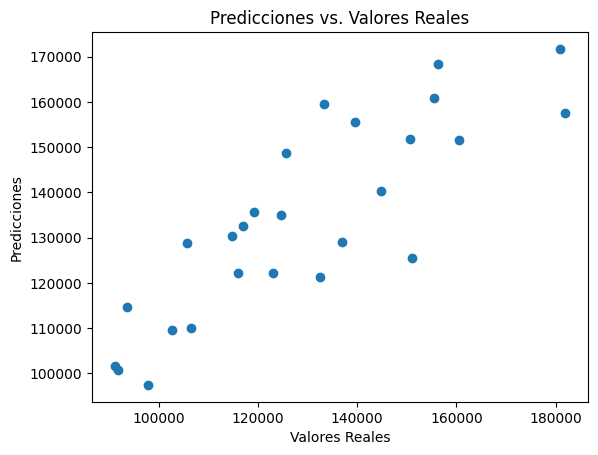

In [137]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test_no_cat, y_pred_no_cat)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Al parecer, el modelo excluyendo las columnas categóricas e incluyendo la oferta es la que mejor performance tiene.

### 6. Predicción

Realizamos la predicción con el modelo entrenado.

* Tamaño: 2000 pies cuadrados
* Habitaciones: 3
* Baños: 2

Vemos el orden de los parámetros

In [138]:
X_test_no_cat_no_offer.head()

,SqFt,Bedrooms,Bathrooms
40,1560,2,2
24,2210,4,3
86,1900,4,2
51,1860,2,2
8,2110,4,2


Predecimos el valor con este nuevo modelo.

In [139]:
nueva_prediccion = modelo_no_cat_no_offer.predict([[2000, 3, 2]])
valor_predicho = nueva_prediccion[0]

print(f"El valor predicho es: {valor_predicho}")

El valor predicho es: 124924.52403879663


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Visualizamos en el dataframe valores similares a ver si el valor se acerca.

In [140]:
df[(df["SqFt"] == 2000) & (df["Bedrooms"] == 3) & (df["Bathrooms"] == 2)]

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
21,22,113800,2000,3,2,4,no,north
113,114,115700,2000,3,2,3,yes,north


Al parecer, el valor se acerca aunque hay una diferencia de approx 9.000-11.000 en el precio resultante.